# CMSC471 - Artificial Intelligence - Spring 2022
## Instructor: Fereydoon Vafaei
# <font color="blue"> Assignment 4: Classification</font>

*Type your name and ID here*

## Overview and Learning Objectives

You've learned very important and fundamental concepts in ML so far. This assignment will take your understanding to the next level by some insightful exercises. What you practice in this assignment are critical ML skills.</b>

In this assignment, you are going to build and compare three classifiers applied on South African Heart Disease dataset from the book: ["Elements of Statistical Learning"](https://web.stanford.edu/~hastie/ElemStatLearn/) by T. Hastie, R. Tibshirani, and J. Friedman.

**AI/Machine Learning in Healthcare** is currently one of the trend application domains of ML. According to [ReportLinker](https://www.reportlinker.com/p05251483/Global-AI-in-Healthcare-Market-Report-for.html), "spending on this category is forecasted to jump from \\$2.1 billion to \\$36.1 billion by 2025. This is a 50.2% Compound Annual Growth Rate (CAGR)."

<b>Note: </b>As you work through this assignment, you are recommended to check the textbook examples, notebooks and sklearn documentations.

<b>Course Policy Reminder:</b>
Debugging and error resolution are always students' responsbility. This policy will be enforced in email communications and the office hours. Keep in mind that all assignments are individual graded tasks. Any collaboration with other students is strictly prohibited and is considered as cheating. Students should NOT share any answer, solution, or code with other students. Violations of these policies would be penalized according to UMBC academic integrity policy.

**You must run ALL cells** and get the correct outputs for all cells and give complete answers to all questions. **Cells/codes with no output get zero!**

Pedagogically, this assignment will help you:
- better understand classification.

- getting started with scikit-learn and its built-in methods, as well as implemented classification models.

- practice data preprocessing.

- practice model evaluation using performance metrics and cross validation.

- learn how to plot ROC curves.

Wherever needed, you should replace `...` elipsis with your code.

`...` may indicate one or more lines of missing codes. Some outputs are provided to you to use as reference and to verify that your output is correct. Other outputs are NOT provided intentionally.

## Import Cell

The first step is importing all necessary python and sklearn modules. **You definitely need to add to the following imports as you work on the assignment.** When you import a new module, add it here in the same cell. All imports should be in this cell.

In [1]:
''' Import all the necessary modules from python and sklearn
You may start with pandas, numpy and matplotlib, and keep adding the necessary modules here as you move forward.
'''
...

## Preprocessing

You are going to build three classifiers from sklearn to predict heart disease. First, download the data [SAheart.csv](https://github.com/fereydoonvafaei/CMSC471-Spring-2022/blob/main/SAheart.csv) and save it in your working directory.

> Next, load the data with pandas. The data (csv file) should be stored in the same working directory as your notebook.

In [2]:
heart_data = ...

In [3]:
# Print heart_data shape and the first five rows
...

(462, 11)


,row.names,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd
0,1,160,12.00,5.73,23.11,Present,49,25.30,97.20,52,1
1,2,144,0.01,4.41,28.61,Absent,55,28.87,2.06,63,1
2,3,118,0.08,3.48,32.28,Present,52,29.14,3.81,46,0
3,4,170,7.50,6.41,38.03,Present,51,31.99,24.26,58,1
4,5,134,13.60,3.50,27.78,Present,60,25.99,57.34,49,1


Here is some description about the features from the data source:

> "A retrospective sample of males in a heart-disease high-risk region of the Western Cape, South Africa. There are roughly two controls per case of CHD. Many of the CHD positive men have undergone blood pressure reduction treatment and other programs to reduce their risk factors after their CHD event. In some cases the measurements were made after these treatments. These data are taken from a larger dataset, described in  Rousseauw et al, 1983, South African Medical Journal." 

        sbp	        systolic blood pressure
        tobacco		cumulative tobacco (kg)
        ldl		    low densiity lipoprotein cholesterol
        adiposity
        famhist		family history of heart disease (Present, Absent)
        typea		  type-A behavior
        obesity
        alcohol		current alcohol consumption
        age		    age at onset
        chd		    label, coronary heart disease


In [4]:
# The first column, row.names is useless for this ML task, drop it!
heart_data = ...

...

(462, 10)


,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd
0,160,12.00,5.73,23.11,Present,49,25.30,97.20,52,1
1,144,0.01,4.41,28.61,Absent,55,28.87,2.06,63,1
2,118,0.08,3.48,32.28,Present,52,29.14,3.81,46,0
3,170,7.50,6.41,38.03,Present,51,31.99,24.26,58,1
4,134,13.60,3.50,27.78,Present,60,25.99,57.34,49,1


In [5]:
# Get the features' data types (dtypes)
...

sbp            int64
tobacco      float64
ldl          float64
adiposity    float64
famhist       object
typea          int64
obesity      float64
alcohol      float64
age            int64
chd            int64
dtype: object

> Next, you need to convert `famhist` from categorical (Present/Absent) to numeric {0,1} so that it can be used by the classifiers.

In [6]:
'''Convert 'famhist' from categorical (object type with Present/Absent values) to numeric {0,1} values
Hint: There are multiple ways to do this using pandas dataframe methods and/or sklearn methods. For instance,
you may use pd.Categorical and and then use .cat.codes to convert the values to [0,1]

Make sure your output looks exactly like the dataframe head below, i.e. famhist values are converted to {0,1}
'''
...

(462, 10)


,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd
0,160,12.00,5.73,23.11,1,49,25.30,97.20,52,1
1,144,0.01,4.41,28.61,0,55,28.87,2.06,63,1
2,118,0.08,3.48,32.28,1,52,29.14,3.81,46,0
3,170,7.50,6.41,38.03,1,51,31.99,24.26,58,1
4,134,13.60,3.50,27.78,1,60,25.99,57.34,49,1


In [7]:
# Check that the type of famhist is int
type(heart_data['famhist'][0])

numpy.int8

In [8]:
# Create X, y, which means separate features from class labels 
# Note that X should contain all the features (columns) except 'chd'
# y should only include 'chd' because it's the target class
X = ...
y = ...

print(X.shape)
print(y.shape)

(462, 9)
(462,)


In [9]:
X.head()

,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age
0,160,12.00,5.73,23.11,1,49,25.30,97.20,52
1,144,0.01,4.41,28.61,0,55,28.87,2.06,63
2,118,0.08,3.48,32.28,1,52,29.14,3.81,46
3,170,7.50,6.41,38.03,1,51,31.99,24.26,58
4,134,13.60,3.50,27.78,1,60,25.99,57.34,49


In [10]:
y.head()

0    1
1    1
2    0
3    1
4    1
Name: chd, dtype: int64

> Next, split the data with a test size of 0.33 using scikit-learn [`train_test_split`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) method.

In [11]:
# Split the data to train and test using train_test_split method with test_size=0.33
X_train, X_test, y_train, y_test = ...

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(309, 9)
(309,)
(153, 9)
(153,)


## Binary Classification

Next, build the classifiers.


> **Required mean cv score**: You should get at least **0.75 mean cv score** for all three classifiers (0.75 would be the rounded value with two decimal points). You may begin with the default hyperparameter values; however, you may need fine-tune them accordingly to satisfy the minimum mean cv score requirement. **If your classifier doesn't meet the cv score requirement, it will get zero.**


> You may check out scikit-learn documentations to see what hyperparameters are available for each classifier: [Logistic Regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html), [Linear SVM](https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html#sklearn.svm.LinearSVC), [Random Forest](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html).

> **Note:** Whenever you perform cross validation, you should apply the method on the whole `X`, whereas when you use `.fit()` method, you apply it on `X_train` only.

In [12]:
# Create a LogisticRegression with a 'liblinear' solver
logreg_clf = ...

# Perform a 10-fold cross validation with scoring='roc_auc'
# Note: cross validation should be done on the whole X
logreg_cv_score = ...

print("Mean CV Score - Logistic Regression: ", logreg_cv_score.mean())

Mean CV Score - Logistic Regression:  0.761518817204301


In [20]:
# Create a Linear SVM Classifier using LinearSVC()
svm_clf = ...

# Perform a 10-fold cross validation with scoring='roc_auc'
svm_cv_score = ...

print("Mean CV Score - Linear SVM: ", svm_cv_score.mean())

Mean CV Score - Linear SVM:  0.7568346774193547


In [21]:
# Create a RandomForestClassifier
rf_clf = ...

# Perform a 10-fold cross validation with scoring 'roc_auc'
rf_cv_score = ...

print("Mean CV Score - Random Forest: ", rf_cv_score.mean())

Mean CV Score - Random Forest:  0.7526344086021506


> Next, you're going to fine-tune your rf classifier solely based on `max_leaf_nodes` hyperparameter. Depending on your computer speed, this may take a few minutes. Follow the comments in the following cell carefully, and plot the impact of `max_leaf_nodes` on mean cv scores. You're going to perform 10-fold cross validation. cv `scoring` will still be `roc_auc`. **Incomplete/incorrect plots will get zero.**

Text(0, 0.5, 'Mean cv score')

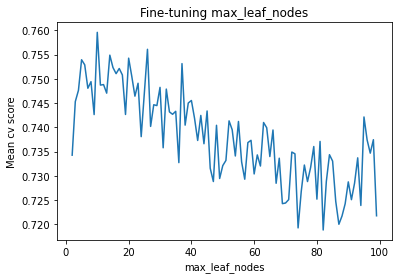

In [23]:
'''Now fine-tune max_leaf_nodes hyperparameter as follows:

1- Write a for loop that iterates over max_leaf_nodes_list from 1 to 100
2- In each iteration, do 10-fold cv and calculate rf_cv_score.mean() and append it to the list rf_mean_cv_scores
3- Finally, plot rf_mean_cv_scores on y-axis versus max_leaf_nodes_list on x-axis

Your plot should have the title "Fine-tuning max_leaf_nodes", and proper label for each axis

# Incomplete plots will get zero
# Running this cell may take a few minutes
'''

rf_mean_cv_scores = []
max_leaf_nodes_list = range(1, 100)

...

In [1]:
# Train the rf_clf on the training set using .fit() method
...

# Get feature_importances of rf_clf for all features
for name, score in zip(heart_data, rf_clf.feature_importances_):
    print(name, score)

> Next, you're going to plot ROC curve. The provided code in the following cells show how you can plot ROC curve using fpr, tpr, and threshold returned by `metrics.roc_curve` and class probabilities using `predict_proba()` method. Notice that some classifiers don't have `predict_proba()`, and in that case you can use `decision_function()` method to get the scores.

In [25]:
# Get class probabilities, fpr, tpr and threshold for random forest
rf_probs = rf_clf.predict_proba(X_test)
rf_preds = rf_probs[:,1]
rf_fpr, rf_tpr, rf_threshold = metrics.roc_curve(y_test, rf_preds)
rf_roc_auc = metrics.auc(rf_fpr, rf_tpr)

Text(0.5, 0, 'False Positive Rate')

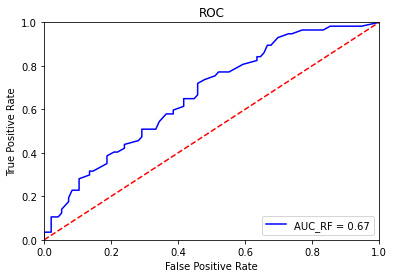

In [26]:
# Plot ROC curve
plt.title('ROC')
plt.plot(rf_fpr, rf_tpr, 'b', label = 'AUC_RF = %0.2f' % rf_roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

> Next, Plot ROC for all three classifiers in ONE plot with different colors, and with AUC scores shown on the `'lower right'` of the plot for each classifier.

In [2]:
# Train the svm_clf and logreg_clf on the training set using .fit() method
...

In [4]:
'''Plot ROC for all three classifiers with different colors in one plot,
and with AUC scores shown on the 'lower right' of the plot.

Plot should have title and axis lables.

Write as many number of lines of code as needed.

Hint1: You may use the code for random forest ROC curve,
and use different names for different variables of each classifier.

Hint2: LinearSVC doesn't have predict_proba() method,
instead, you should directly use decision_function() method to compute svm_preds
'''

...

## Classification Questions

Answer the following questions HERE:

**Q1 (5 points)** - Which classifier has a better performace according to ROC curves above? Which one is the 2nd best according to ROC plot?

Answer - Q1:

**Q2 (5 points)** - What is the most important feature of this dataset for the random forest classifier? <b>Hint:</b> Check back the previous cells where you get them!

Answer - Q2: 

**Q3 (5 points)** - According to the fine-tuning plot of `max_leaf_nodes`, what is an appropriate range for `max_leaf_nodes`. You should GIVE A COMPLETE ANSWER based on your plot results, and make reasonable arguments. Incomplete answers will get ZERO!

Answer - Q3: 

## Grading

Assignment 4 has a maximum of 100 points. Make sure that you get the correct outputs and plots for all cells that you implement and give complete answers to all questions. Also, your notebook should be written with no grammatical and spelling errors and should be nicely-formatted and easy-to-read.

The breakdown of the 100 points is as follows:

Classification implementaion has 85 points:
- 15 points: data preprocessing.
- 30 points: 3 classifiers - each classifier (and cv) implementation has 10 points. Mean cv score must be at least 0.75 to get points. Otherwise the classifier will get zero.
- 20 points: max_leaf_nodes fine-tuning plot.
- 20 points: correct plot of 3 ROC for 3 classifiers in one plot with different colors with title and axis labels.

Classification questions have 15 points (5 points each).

Follow the instructions of each section carefully. Up to 10 points may be deducted if your submitted notebook is not easy to read and follow or if it has grammatical, spelling or formatting issues.

Grading will be based on 

  * correct implementation, correct results and plots, correct answer to the questions, and
  * readability of the notebook.

## Submission

Name your notebook ```Lastname-A4.ipynb```. Submit the file using the ```Assignment-4``` link on Blackboard.
  
<font color=red><b>Due Date: Wednesday May 4th, 11:59PM</b></font>